# CIFAR 10 - Categorical Classification

In [ ]:
import warnings
warnings.filterwarnings('ignore')

# I. CIFAR 10 Data_Set Load & Review

> ## 1) Load CIFAR 10 Data_Set

In [ ]:
from tensorflow.keras.datasets import cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 3s 0us/step


* Train_Data Information

In [ ]:
print(len(X_train))
print(X_train.shape)
print()
print(len(y_train))
print(y_train[0:5])

50000
(50000, 32, 32, 3)

50000
[[6]
 [9]
 [9]
 [4]
 [1]]


* Test_Data Information

In [ ]:
print(len(X_test))
print(X_test.shape)
print()
print(len(y_test))
print(y_test[0:5])

10000
(10000, 32, 32, 3)

10000
[[3]
 [8]
 [8]
 [0]
 [6]]


> ## 2) Visualization

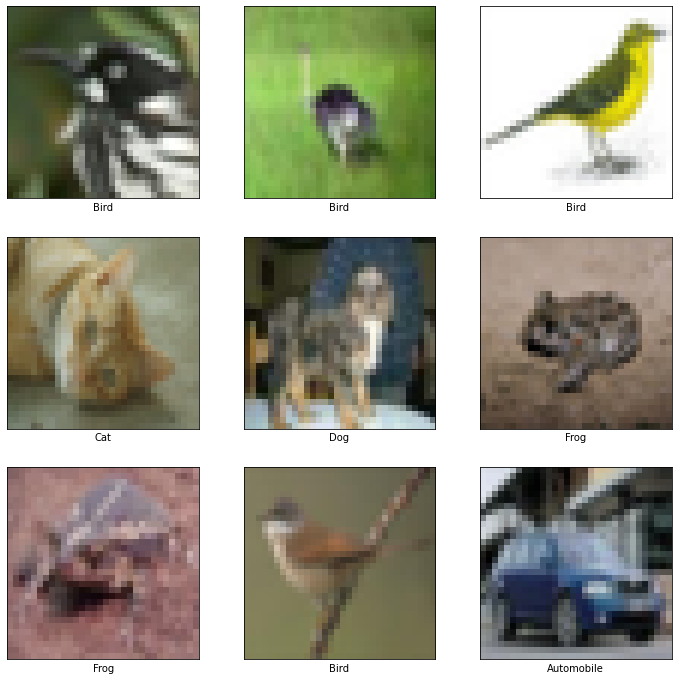

In [ ]:
class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 
               'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

import matplotlib.pyplot as plt
import numpy as np

Indexes = np.random.randint(50000,
                            size = 9) 

plt.figure(figsize = (12, 12))
for i, idx in enumerate(Indexes):
    plt.subplot(3, 3, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_train[idx])
    plt.xlabel(class_names[int(y_train[idx])])
    
plt.show()

* RGB Channels

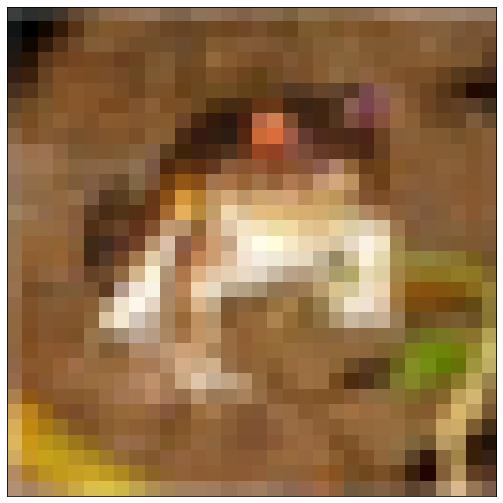

In [ ]:
digit = X_train[0]

plt.figure(figsize = (9, 9))
plt.imshow(digit)
plt.xticks([])
plt.yticks([])
plt.show()

In [ ]:
import numpy as np
import sys
np.set_printoptions(linewidth = 150, threshold = sys.maxsize)

print(y_train[0])
print()
print(X_train[0][0][0])
# print(X_train[0][:, :, 0])

[6]

[59 62 63]


# II. Data Preprocessing

> ## 1) Reshape and Normalization

* reshape
 * (50000, 32, 32, 3) to (50000, 3072)

In [ ]:
X_train = X_train.reshape((50000, 32 * 32 * 3))
X_test = X_test.reshape((10000, 32 * 32 * 3))

X_train.shape, X_test.shape

((50000, 3072), (10000, 3072))

* Normalization

In [ ]:
X_train = X_train.astype(float) / 255
X_test = X_test.astype(float) / 255

In [ ]:
print(X_train[0])

[0.23137255 0.24313725 0.24705882 0.16862745 0.18039216 0.17647059 0.19607843 0.18823529 0.16862745 0.26666667 0.21176471 0.16470588 0.38431373
 0.28627451 0.20392157 0.46666667 0.35686275 0.24705882 0.54509804 0.41960784 0.29411765 0.56862745 0.43137255 0.31372549 0.58431373 0.45882353
 0.34901961 0.58431373 0.47058824 0.36470588 0.51372549 0.40392157 0.30196078 0.49019608 0.38823529 0.29803922 0.55686275 0.45098039 0.35686275
 0.56470588 0.43921569 0.3372549  0.5372549  0.41176471 0.30980392 0.50588235 0.38039216 0.27843137 0.5372549  0.41568627 0.30980392 0.5254902
 0.41568627 0.29803922 0.48627451 0.38039216 0.25098039 0.54509804 0.44313725 0.30588235 0.54509804 0.43921569 0.29411765 0.52156863 0.41176471
 0.27058824 0.53333333 0.41176471 0.29019608 0.54509804 0.42352941 0.30196078 0.59607843 0.47058824 0.34901961 0.63921569 0.51372549 0.39215686
 0.65882353 0.53333333 0.42352941 0.62352941 0.50588235 0.4        0.61960784 0.50980392 0.40784314 0.61960784 0.51764706 0.42352941 0.59

> ## 2) One Hot Encoding

In [ ]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
print(y_train[:5])

[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


> ## 3) train_test_split( )

* Train(40,000) vs. Validation(10,000)

In [ ]:
from sklearn.model_selection import train_test_split 

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train,
                                                      test_size = 0.2,
                                                      random_state = 2045)

# III. Keras Modeling

> ## 1) Model Define

* 모델 신경망 구조 정의
 - 3개의 Hidden Layers & 2816개의 Nodes
 - Dropout Layer

In [ ]:
from tensorflow.keras import models
from tensorflow.keras import layers

CIFAR = models.Sequential()
CIFAR.add(layers.Dense(2048, activation = 'relu', input_shape = (32 * 32 * 3,)))
# CIFAR.add(layers.Dropout(0.4))
CIFAR.add(layers.Dense(512, activation = 'relu'))
# CIFAR.add(layers.Dropout(0.4))
CIFAR.add(layers.Dense(128, activation = 'relu'))
CIFAR.add(layers.Dense(10, activation = 'softmax'))

* 모델 구조 확인

In [ ]:
CIFAR.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2048)              6293504   
                                                                 
 dense_1 (Dense)             (None, 512)               1049088   
                                                                 
 dense_2 (Dense)             (None, 128)               65664     
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 7,409,546
Trainable params: 7,409,546
Non-trainable params: 0
_________________________________________________________________


> ## 2) Model Compile

* 모델 학습방법 설정

In [ ]:
CIFAR.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

> ## 3) Callbacks( )

> ### (1) EarlyStopping( )

* monitor : 모니터링 대상 성능
* mode : 모니터링 대상을 최소화(min) 또는 최대화(max)
* patience : 성능이 개선되지 않는 epoch 횟수

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

es = EarlyStopping(monitor = 'val_accuracy', 
                   mode = 'max', 
                   patience = 50, 
                   verbose = 1)

> ### (2) ModelCheckpoint( )

* 'best_boston.h5' : 최적모델이 저장될 경로
* save_best_only : 최적모델만 저장할지 지정

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

mc = ModelCheckpoint('best_CIFAR.h5', 
                     monitor = 'val_accuracy', 
                     mode = 'max', 
                     save_best_only = True,
                     verbose = 1)

> ## 4) Model Fit

* 약 3분

In [ ]:
%%time

Hist_CIFAR = CIFAR.fit(X_train, y_train,
                       epochs = 500,
                       batch_size = 128,
                       callbacks = [es, mc],
                       validation_data = (X_valid, y_valid))

Epoch 1/500
306/313 [============================>.] - ETA: 0s - loss: 1.9984 - accuracy: 0.2874
Epoch 1: val_accuracy improved from -inf to 0.33930, saving model to best_CIFAR.h5
313/313 [==============================] - 9s 9ms/step - loss: 1.9951 - accuracy: 0.2882 - val_loss: 1.8224 - val_accuracy: 0.3393
Epoch 2/500
313/313 [==============================] - ETA: 0s - loss: 1.7244 - accuracy: 0.3792
Epoch 2: val_accuracy improved from 0.33930 to 0.40350, saving model to best_CIFAR.h5
313/313 [==============================] - 2s 7ms/step - loss: 1.7244 - accuracy: 0.3792 - val_loss: 1.6722 - val_accuracy: 0.4035
Epoch 3/500
310/313 [============================>.] - ETA: 0s - loss: 1.6461 - accuracy: 0.4096
Epoch 3: val_accuracy improved from 0.40350 to 0.41370, saving model to best_CIFAR.h5
313/313 [==============================] - 2s 7ms/step - loss: 1.6460 - accuracy: 0.4096 - val_loss: 1.6300 - val_accuracy: 0.4137
Epoch 4/500
312/313 [============================>.] - ETA: 0

> ## 5) 학습 결과 시각화

* Loss Visualization

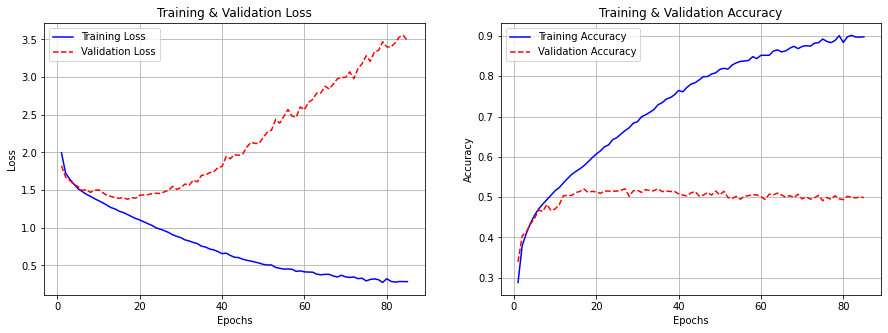

In [ ]:
import matplotlib.pyplot as plt

epochs = range(1, len(Hist_CIFAR.history['loss']) + 1)

plt.figure(figsize = (15, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, Hist_CIFAR.history['loss'], 'b-')
plt.plot(epochs, Hist_CIFAR.history['val_loss'], 'r--')
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(epochs, Hist_CIFAR.history['accuracy'], 'b-')
plt.plot(epochs, Hist_CIFAR.history['val_accuracy'], 'r--')
plt.title('Training & Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.grid()

plt.show()

> ## 6) Load Best Model

In [ ]:
!ls -l

total 86872
-rw-r--r-- 1 root root 88951336 Mar 25 01:27 best_CIFAR.h5
drwxr-xr-x 1 root root     4096 Mar 23 18:57 sample_data


In [ ]:
from tensorflow.keras.models import load_model

best_CIFAR = load_model('best_CIFAR.h5')

> ## 7) Model Evaluate

* Loss & Accuracy

In [ ]:
loss, accuracy = best_CIFAR.evaluate(X_test, y_test, verbose = 0)

print('Loss = {:.5f}'.format(loss))
print('Accuracy = {:.5f}'.format(accuracy))

Loss = 1.69536
Accuracy = 0.51220


> ## 8) Model Predict

* Probability

In [ ]:
np.set_printoptions(suppress = True, precision = 9)

print(best_CIFAR.predict(X_test[:1,:], verbose = 0))

[[0.1440695   0.003361236 0.010909121 0.09241698  0.64623183  0.000812038 0.000268835 0.039022926 0.060566064 0.002341463]]


* Class

In [ ]:
print(np.argmax(best_CIFAR.predict(X_test[:1,:], verbose = 0)))

4


> ## 9) Image Visualization

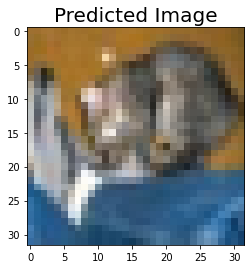

In [ ]:
plt.imshow(X_test[0].reshape(32, 32, 3), cmap = 'gray')
plt.title('Predicted Image', fontsize = 20)
plt.show()

# 
# 
# 
# The End
# 
# 
# 